In [94]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7
# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval



In [95]:
df = pd.read_csv('datasets_1358_30676_Players.csv')
df.head(10)

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
5,5,Gene Berce,180.0,79.0,Marquette University,1926.0,NaN,NaN
6,6,Charlie Black,196.0,90.0,University of Kansas,1921.0,Arco,Idaho
7,7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania
8,8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927.0,New Brunswick,New Jersey
9,9,Vince Boryla,196.0,95.0,University of Denver,1927.0,East Chicago,Indiana


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3922 non-null   int64  
 1   Player       3921 non-null   object 
 2   height       3921 non-null   float64
 3   weight       3921 non-null   float64
 4   collage      3573 non-null   object 
 5   born         3921 non-null   float64
 6   birth_city   3452 non-null   object 
 7   birth_state  3439 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 245.2+ KB


In [97]:
df2 = df.groupby('collage').count()
df3 = df2.sort_values('Player',ascending=False).reset_index().head(20)
df3.head()

,collage,Unnamed: 0,Player,height,weight,born,birth_city,birth_state
0,University of Kentucky,89,89,89,89,89,84,84
1,"University of California, Los Angeles",86,86,86,86,86,85,84
2,University of North Carolina,67,67,67,67,67,65,65
3,University of Kansas,59,59,59,59,59,58,58
4,Duke University,56,56,56,56,56,54,54


## 1.Топ 20 колледжей, из которых чаще всего попадали в игроки 

<BarContainer object of 20 artists>

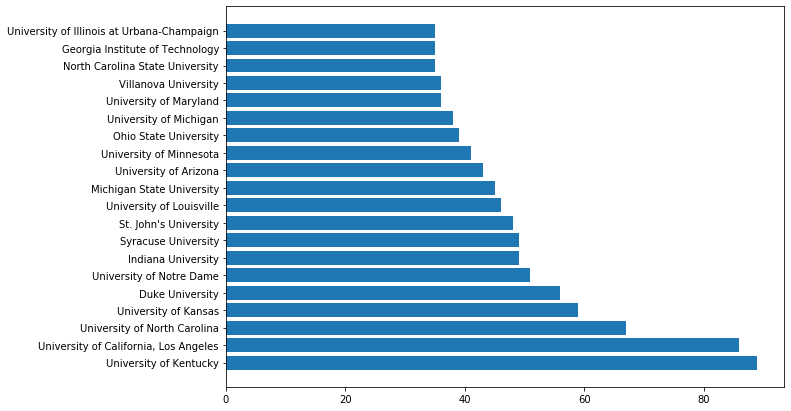

In [98]:
plt.barh(df3['collage'], df3['Player'])

In [99]:
df2 = df.groupby('collage').count()[['Player']].sort_values('Player',ascending=False)
df2.head()

,Player
collage,
University of Kentucky,89
"University of California, Los Angeles",86
University of North Carolina,67
University of Kansas,59
Duke University,56


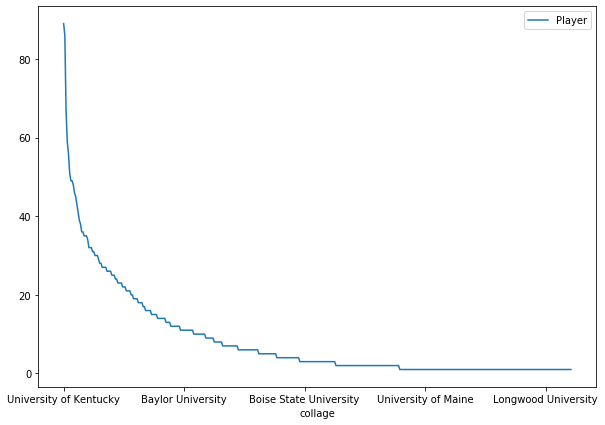

In [100]:
#Зависимость в виде линейного графика
df2.plot()

## 2. Зависимость роста от года рождения
На линейном графике посмотрим увеличился или уменьшился рост игроков со временем

In [101]:
df_height = df.groupby('born').agg(['mean'])['height']
df_height.head()


,mean
born,
1913.0,185.000000
1914.0,180.000000
1915.0,198.000000
1917.0,189.333333
1918.0,186.200000


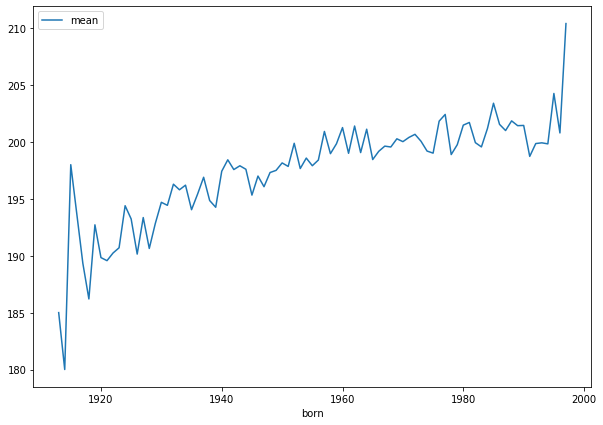

In [102]:
df_height.plot()

Рост игроков со  временем увеличился, но это необязательно, что стали рождаться с более высоким ростом, возможно критерии отбора стали жестче и в команду стали набирать игроков не ниже 198 см, а от 180 до 195 вообще не берут.

## 3. Из какой локации чаще всего попадают игроки, где родились самые высокие игроки

In [103]:
#Далее исследуем место рождения игроков. В этих столбцах есть нулевые значения, поэтому удалим их из датафрэйма
df = df.dropna()
df.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
6,6,Charlie Black,196.0,90.0,University of Kansas,1921.0,Arco,Idaho
7,7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania
8,8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927.0,New Brunswick,New Jersey


In [112]:
# я не смогла отсортировать столбцы после таких отборов(с вложенными столбцами) - поэтому далее я отборами создала два датафрэйма, а потом сджойнила их.
df4 = df.groupby('birth_state').agg({'Player':['size'], 'height':['mean']})
df4

,Player,height
,size,mean
birth_state,,
Alabama,74,199.716216
Alaska,1,188.000000
Argentina,2,195.500000
Arizona,12,194.500000
Arkansas,47,198.297872
...,...,...
Virginia,60,197.833333
Washington,48,198.520833


In [108]:
birth_state_height = df.groupby('birth_state').agg(['mean'])['height'].sort_values('mean',ascending=False).head(20)

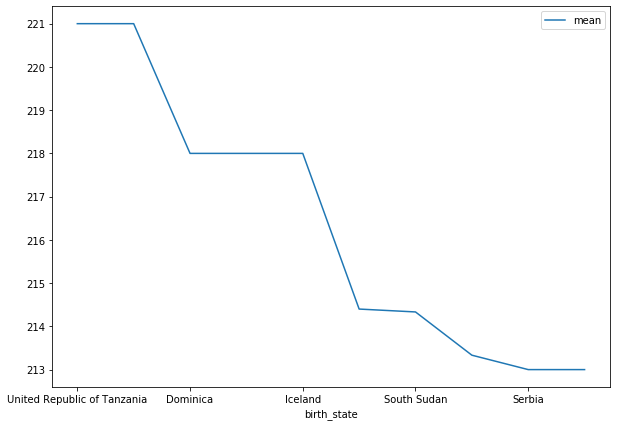

In [110]:
birth_state_height.plot()
#Здесь более наглядно видно, что самые высокие игроки из Танзании.

In [117]:
birth_state_dynamics = df.groupby('birth_state').agg(['size'])['Player'].sort_values('size',ascending=False).head(20)
birth_state_dynamics

,size
birth_state,
California,337
New York,286
Illinois,203
Pennsylvania,162
Ohio,136
Michigan,131
Texas,127
Georgia,113
Louisiana,101


In [118]:
birth_state_height

,mean
birth_state,
United Republic of Tanzania,221.000000
Montenegro,221.000000
Dominica,218.000000
Democratic Republic of the Congo,218.000000
Iceland,218.000000
Netherlands,214.400000
South Sudan,214.333333
Brazil,213.333333
Serbia,213.000000


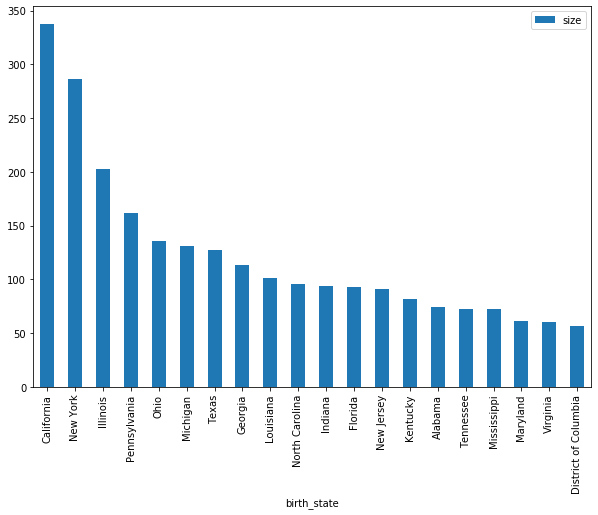

In [120]:
birth_state_dynamics.plot(kind='bar')#Частота попадания игроков в сборную, чаще попадают из Калифорнии

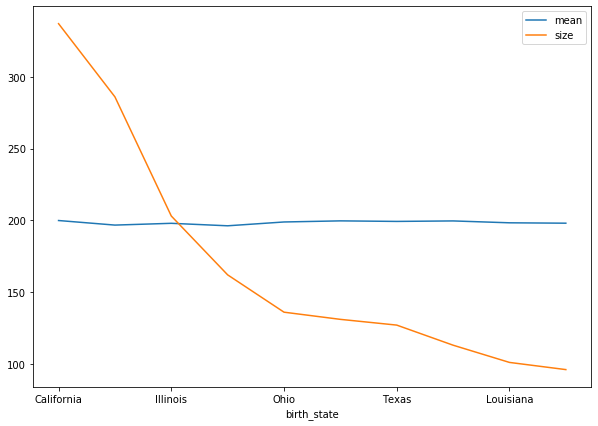

In [127]:
birth_state_height = df.groupby('birth_state').agg(['mean'])['height'].sort_values('mean',ascending=False)
birth_state_dynamics = df.groupby('birth_state').agg(['size'])['Player'].sort_values('size',ascending=False)
df_join = birth_state_height.join(birth_state_dynamics)
df_join_1 = df_join.sort_values(['size','mean'], ascending=[False,False]).head(10)
df_join_1.plot()# Зависимости от места рождения, роста и частоты попадания игроков в сборную нет.

## 4. Распределение по росту игроков

Text(0, 0.5, 'players')

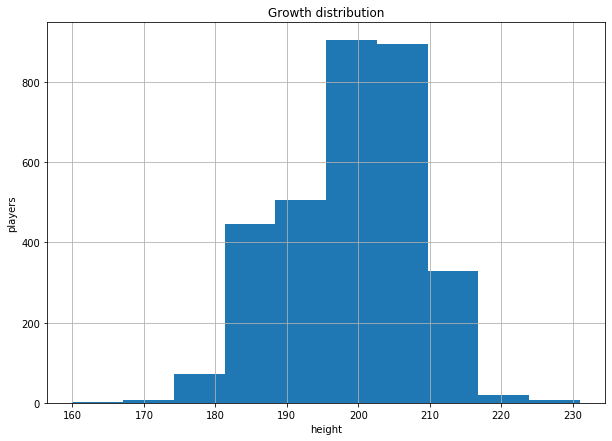

In [132]:
ax = df.height.hist()
ax.set_title('Growth distribution')
ax.set_xlabel('height')
ax.set_ylabel('players')
#Больше 800 игроков ростом выше двух метров. 
#Возможно штат игроков стал больше после 1960 г, потому что с этого года принимают в основном игроков с таким ростом.

In [133]:
#Сравнение трех величин: роста, веса и года рождения. Видим зависимость веса от роста. Вес и рост не зависят от года рождения.
import seaborn as sns

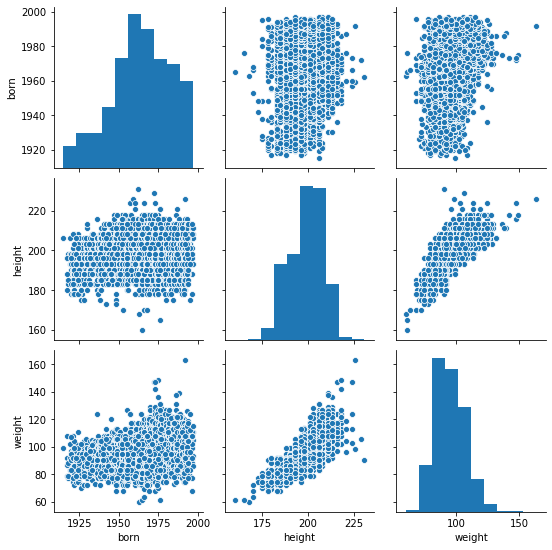

In [134]:
sns_df = sns.pairplot(
    df[['born', 'height', 'weight']])
sns_df

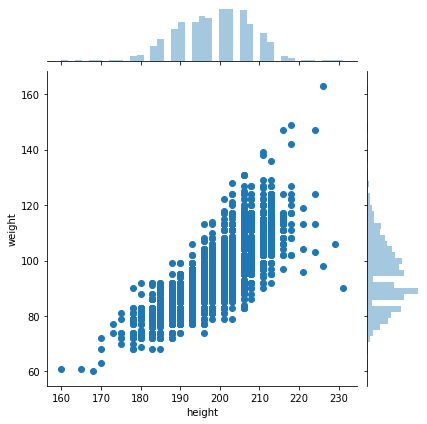

In [137]:
sns.jointplot(x='height', y='weight', 
              data=df, kind='scatter')

## 5. boxplot топ 5 штатов чаще всего откуда родом игроки, распределения высоты роста игроков по данной пятерке мест.

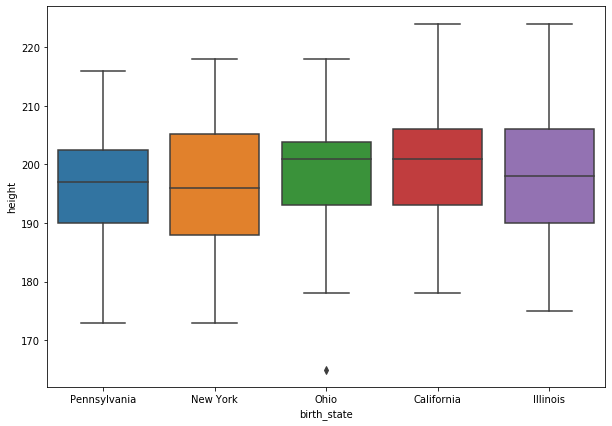

In [143]:
top_birth_state = df.birth_state.value_counts().sort_values(ascending = False).head(5).index.values
top_birth_state
ax = sns.boxplot(x="birth_state", y="height", 
            data=df[df.birth_state.isin(top_birth_state)])
#boxplot для топ 5 штатов, из которых чаще всего попадают игроки - распределение по росту.
#Например самые высокие родом из  Калифорнии: 50% игроков около двух метров(201), 25% - 193 см, и 25% - 206 см, 
#самые низкие около 178 см и самые высокие около 224 см, выбросов нет
#В среднем самые низкие В Нью-Йорке: верхний квартиль совпадает, но нижний квартиль 188 см, медиана  196 см,
#из этого города игроки  ниже ростом - значит высоких игроков(если мы захотим их найти) следует искать в Калифорнии.


In [146]:
#Тот же самый график, но построенный с помощью библиотеки plotly, можно посмотреть более точные значения, а не предполагать.
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [147]:
data = []
for state in top_birth_state:
    data.append(
        go.Box(y=df[df.birth_state==state].height, 
               name=state)
    )
iplot(data, show_link = False)